<a href="https://colab.research.google.com/github/Adisriman/AlexandriaRepo/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()

In [6]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [13]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [0]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

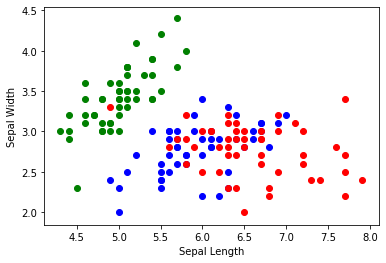

In [19]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue")
plt.scatter(df2['sepal length (cm)'],df1['sepal width (cm)'],color="red")

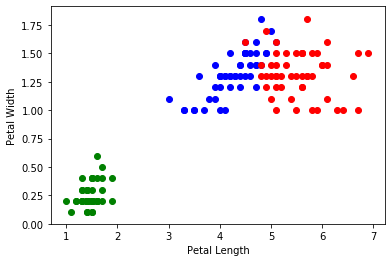

In [20]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="blue")
plt.scatter(df2['petal length (cm)'],df1['petal width (cm)'],color="red")

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=df.drop(['target','flower_name'],axis='columns')
Y=df.target

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [24]:
len(X_train)

120

In [25]:
len(X_test)

30

In [26]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
69,5.6,2.5,3.9,1.1
115,6.4,3.2,5.3,2.3
64,5.6,2.9,3.6,1.3
29,4.7,3.2,1.6,0.2
122,7.7,2.8,6.7,2.0
48,5.3,3.7,1.5,0.2
81,5.5,2.4,3.7,1.0
103,6.3,2.9,5.6,1.8
138,6.0,3.0,4.8,1.8
7,5.0,3.4,1.5,0.2


In [0]:
from sklearn.svm import SVC

model=SVC()

In [28]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
model.score(X_test,Y_test)

0.9333333333333333

In [30]:
model.predict([[4.3,4.2,4.5,5.2]])

array([2])

In [0]:
model_k =SVC(kernel="linear")

In [33]:
model_C=SVC(C=1000)
model_C.fit(X_train,Y_train)
model_C.score(X_test,Y_test)

0.9666666666666667

In [35]:
model_g=SVC(gamma=2)
model_g.fit(X_train,Y_train)
model_g.score(X_test,Y_test)


0.9666666666666667